# Predicting Future Retail Performance Based on Discounting Activity

# Background

Modern furniture retailer with 70 brick and mortar stores along with direct (web & phone) business

$170 million in annual sales – with a dataset that includes 8 quarters of of transactions with approximately 60k observations per quarter

The Problem: Based on the dataset, what trigger events can be identified that will lead to increased performance throughout the chain? More specifically, how does prevalence of discounts effect profitability?

Conclusions from these predictions can help steer corporate strategy, company messaging / marketing and store sales priorities

# Dataset

The dataset is actual data for the fiscal years 2007 and 2008
Approximately 60k observations per quarter
Observations are broken down to unique ItemCode / SKUCode (can include multiple units of same SKU).

Features for the dataset include:

ShipDate (date the order left DC)

OrderNumber (can apply to multiple products / lines)

ItemCode, ItemDescription, SKUCode (unique product description) 

OrderLocation (which store or web / phone)

Department (which buying group is responsible for the ItemDescription)

UnitsSold, TotalNetRevenue, TotalCOGS (sales & profit data)

    
CurrentRetailPriceEach (can determined discounting)



# Do stores that discount more aggressively than stores under the same brand perform better?

Discounting is a way to attract immediate sales / volume at the expense of profits. Discounts when strategically applied can improve a store’s performance (both top and bottom line) as compared to stores that do not discount as often. 

Although there are numerous chainwide discounts, managers have discretion to offer discounts to customers in order to close at risk sales and to address customer service issues. 


# Potential Methods and Models


*** Logistical regression ***

-> Does a store discount greater or less than the mean of the fleet?
     (greater / less)
     
-> Does a store perform better on a comp sales bases or worse than the mean of the fleet?
    (better / worse)
    
-> Is the store more or less profitable than the mean of the fleet?
    (more / less)

*** Linear regression***

What correlations can be found among the entire fleet:

-> same store comp% 
    
-> store discount rate%

-> % of assortment from the classics collection

-> Total volume ($s)

-> Gross margin% 

# Outstanding Questions, Assumptions, Risks and Cavaets

Location of stores

Externalities (housing bubble burst)

Need to group data appropriately for comp purposes 

In [2]:
import os

import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)


import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/Users/samuelleichman/DS-SF-30/unit-project/dataset/Q107v5.csv')

/Users/samuelleichman/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,ShipDate,Order_Week,OrderNumber,ItemCode,ItemDescription,...,Class,Quarter,Discount,DR,Full_Path_Sales
0,1/4/07 0:00,Week 1,G0793000,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-0.005,2.97619E-05,168.00
1,1/10/07 0:00,Week 2,G0797733,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-127.680,0.76,168.00
2,1/11/07 0:00,Week 2,G0798198,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-77.952,0.464,168.00
3,1/23/07 0:00,Week 4,G0791027,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,0.000,0,168.00
4,1/25/07 0:00,Week 4,G0806888,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-117.600,0.7,168.00
5,1/31/07 0:00,Week 5,G0755386,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-117.600,0.7,168.00
6,2/21/07 0:00,Week 8,G0820984,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-0.001,5.95238E-06,168.00
7,3/3/07 0:00,Week 9,G0827893,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-33.600,0.2,168.00
8,3/19/07 0:00,Week 12,G0839590,10027 CRYSTAL,"Crystal Marquise Desktop Globe, Crystal",...,ACCESSORIES,Q1 07,-100.800,0.6,168.00
9,1/2/07 0:00,Week 1,WEB0789869,10125 CLEAR,"Mistic Candle Cups, Clear",...,ACCESSORIES,Q1 07,0.000,0,29.95


In [5]:
df.dtypes

ShipDate                    object
Order_Week                  object
OrderNumber                 object
ItemCode                    object
ItemDescription             object
OrderLocation               object
SKUCode                      int64
Department                  object
UnitsSold_                   int64
NetRevenue                 float64
TotalCOGS_                 float64
GrossMarginDollars_        float64
GrossMarginPercent_        float64
CurrentAverageCost_        float64
CurrentRetailPriceEach_    float64
Current_GM_Each_           float64
Class                       object
Quarter                     object
Discount                   float64
DR                          object
Full_Path_Sales            float64
dtype: object

In [6]:
df.NetRevenue.sum() / 2

22444756.782499053

In [7]:
df_1 = [df["Department"].value_counts()]

In [8]:
# how can I put df_1 into a histogram?
df_1

[CLASSICS             8992
 SEATING & DINING     8638
 TOOLS FOR LIVING     8242
 UPHOLSTERY           7844
 LIGHTING             6208
 WORKSPACE            4830
 OUTDOOR              3920
 FLOOR COVERINGS      2903
 BEDROOM              2751
 ACCESSORIES          2395
 KIDS                 1048
 REPLACEMENT PARTS     420
 NON-MERCHANDISE       314
 BEDDING               145
 Name: Department, dtype: int64]

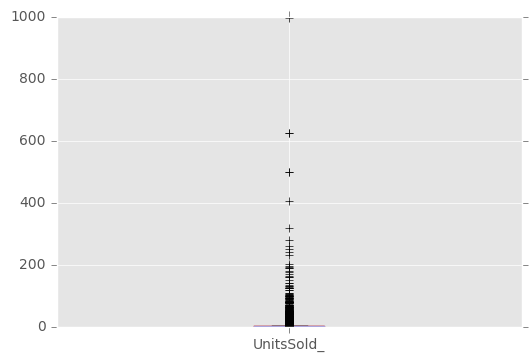

In [9]:
df[ ['UnitsSold_']].plot(kind = 'box')

In [10]:
df[df.TotalNetRevenue_ == df.TotalNetRevenue_.max()]

AttributeError: 'DataFrame' object has no attribute 'TotalNetRevenue_'

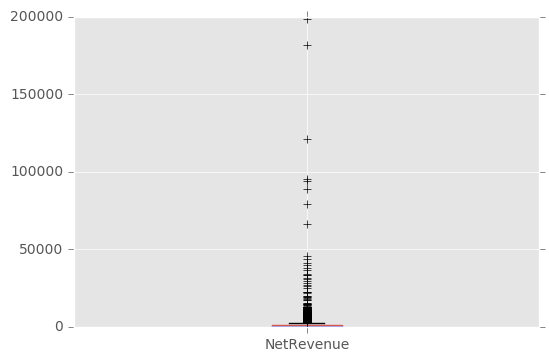

In [11]:
df[ ['NetRevenue']].plot(kind = 'box')

In [74]:
df[ ['OrderLocation', 'TotalNetRevenue_'] ].groupby('OrderLocation').sum()

,TotalNetRevenue_
OrderLocation,
200 - DWR Call Center,4888640.841
205 - zz_Website - dwr.com,7608023.377
210 - San Francisco Studio,645718.478
211 - Palo Alto Studio,380625.326
213 - Santa Monica Studio,624980.046
214 - Beverly Hills Studio,552780.087
215 - Newport Beach Studio,427503.765
216 - Portland Studio,501440.995
217 - Pasadena Studio,503418.742


In [13]:
df[ ['Department', 'NetRevenue','Discount'] ].groupby('Department').sum()

,NetRevenue,Discount
Department,,
ACCESSORIES,1.399953e+05,8253.491
BEDDING,8.442692e+03,-4648.258
BEDROOM,4.294514e+06,-1965814.166
CLASSICS,1.081260e+07,-2226792.777
FLOOR COVERINGS,8.924095e+05,-157815.108
KIDS,5.034552e+04,-4523.784
LIGHTING,3.074318e+06,-638530.393
NON-MERCHANDISE,6.440757e+04,64404.934
OUTDOOR,2.280158e+06,-812095.093


In [81]:
df[ ['ItemDescription', 'TotalNetRevenue_','Discount'] ].groupby('ItemDescription').sum()
# how can I rank by total revenue or discount?
# how can I include a header that will divide two other columns (ie Rev / FullPathRev)

,TotalNetRevenue_,Discount
ItemDescription,,
"1006 Navy Barstool - Brushed, Brushed",17991.981,-6403.019
"1006 Navy Chair Glides Cap HW, None",70.000,-10.000
"1006 Navy Counter Stool - Brushed, Brushed",33929.221,-4150.779
"1006 Navy Semi Upholstered Swivel Arm Chair-SPO, Brushed",829.995,-50.005
"1006 Navy Side Chair - Brushed, Brushed",90362.270,-10362.730
...,...,...
"Zero Top - 35 in (Component), White",0.000,-614.000
"Zero Top - 44 in (Component), Beech",243.898,-27.102
"Zero Top - 44 in (Component), Wenge",763.000,-50.000


In [15]:
df[ ['Order_Week', 'NetRevenue','Discount'] ].groupby('Order_Week').sum()
# how do I format (commas and no decimals)

,NetRevenue,Discount
Order_Week,,
Week 1,2526085.473,-662221.717
Week 10,4275456.860,-1468407.690
Week 11,4798247.888,-1450864.262
Week 12,4082769.098,-1030175.872
Week 13,3992463.530,-1168520.490
Week 2,3161555.620,-882028.330
Week 3,3765778.026,-984854.154
Week 4,2843891.126,-734009.704
Week 5,3256372.305,-778862.235


In [16]:
pd.crosstab(df.Order_Week, df.ItemDescription, dropna = False)
#counts the total count of products

ItemDescription,"1006 Navy Barstool - Brushed, Brushed","1006 Navy Chair Glides Cap HW, None","1006 Navy Counter Stool - Brushed, Brushed","1006 Navy Semi Upholstered Swivel Arm Chair-SPO, Brushed","1006 Navy Side Chair - Brushed, Brushed",...,"Zero Top - 35 in (Component), White","Zero Top - 44 in (Component), Beech","Zero Top - 44 in (Component), Wenge","Zettel'z 5, None",Zig Zag Bottle Rack - Set of 6
Order_Week,,,,,,,,,,,
Week 1,1,0,3,0,4,...,0,0,0,1,0
Week 10,2,0,3,0,20,...,0,1,0,0,0
Week 11,1,0,6,0,5,...,0,0,0,0,0
Week 12,1,0,1,0,8,...,0,0,0,0,0
Week 13,0,1,1,0,6,...,0,0,0,0,0
Week 2,0,0,0,0,3,...,1,0,0,0,1
Week 3,0,0,2,0,5,...,0,0,0,0,0
Week 4,1,0,1,0,5,...,0,0,1,0,0
Week 5,3,0,1,0,7,...,0,0,1,0,0


In [17]:
df['NetRevenue'].value_count()
# how can I count transacitons... 

AttributeError: 'Series' object has no attribute 'value_count'

In [89]:
# how can I create new columns that will be boolean T/F? Is this discounted? 
# how can I evaluate data in groupby?

In [90]:
df.corr()

,SKUCode,UnitsSold_,TotalNetRevenue_,TotalCOGS_,GrossMarginDollars_,...,CurrentAverageCost_,CurrentRetailPriceEach_,Current_GM_Each_,Discount,Full_Path_Sales
SKUCode,1.000000,-0.018557,0.000842,0.008512,-0.007705,...,0.060721,0.069353,0.039868,0.023703,-0.012266
UnitsSold_,-0.018557,1.000000,0.158794,0.120614,0.101404,...,-0.065344,-0.064858,-0.002900,-0.135164,0.170771
TotalNetRevenue_,0.000842,0.158794,1.000000,0.716771,0.683391,...,0.538505,0.547961,-0.016141,-0.495208,0.883414
TotalCOGS_,0.008512,0.120614,0.716771,1.000000,-0.019237,...,0.374576,0.362220,-0.020897,-0.379175,0.646272
GrossMarginDollars_,-0.007705,0.101404,0.683391,-0.019237,1.000000,...,0.379953,0.406448,-0.001264,-0.313059,0.590038
...,...,...,...,...,...,...,...,...,...,...,...
CurrentAverageCost_,0.060721,-0.065344,0.538505,0.374576,0.379953,...,1.000000,0.958897,-0.022743,-0.184914,0.431625
CurrentRetailPriceEach_,0.069353,-0.064858,0.547961,0.362220,0.406448,...,0.958897,1.000000,-0.024593,-0.210069,0.451021
Current_GM_Each_,0.039868,-0.002900,-0.016141,-0.020897,-0.001264,...,-0.022743,-0.024593,1.000000,0.004856,-0.012567
Discount,0.023703,-0.135164,-0.495208,-0.379175,-0.313059,...,-0.184914,-0.210069,0.004856,1.000000,-0.844575


In [18]:
df.describe()

,SKUCode,UnitsSold_,NetRevenue,TotalCOGS_,GrossMarginDollars_,...,CurrentAverageCost_,CurrentRetailPriceEach_,Current_GM_Each_,Discount,Full_Path_Sales
count,58650.000000,58650.000000,58650.000000,58650.000000,58650.000000,...,58650.000000,58650.000000,58650.000000,58650.000000,58650.000000
mean,193970.423905,2.126564,765.379600,390.289636,375.089964,...,300.575441,703.888699,230.335235,-218.509767,983.889368
std,52589.935077,8.642823,1857.619676,1275.122334,1122.243651,...,397.742992,931.221439,5730.814942,1319.353824,2802.609385
min,100205.000000,1.000000,0.000000,0.000000,-54485.894000,...,0.000000,0.000000,-6810.740000,-156976.000000,0.000000
25%,154987.000000,1.000000,133.200000,66.702000,49.876500,...,54.663000,110.000000,35.910000,-221.800000,175.000000
50%,199988.000000,1.000000,360.000000,183.479500,180.289500,...,143.567000,339.000000,43.070000,-72.000000,475.000000
75%,237130.000000,2.000000,979.000000,497.870000,485.709750,...,384.968000,850.000000,53.730000,-7.000000,1275.000000
max,305839.000000,997.000000,198910.400000,122690.659000,101802.720000,...,5529.593000,11750.000000,403150.000000,20240.400000,275100.000000


In [ ]:
# set up logistic regression - what are the A/B 

In [53]:
df[['NetRevenue','GrossMarginPercent_']]

,NetRevenue,GrossMarginPercent_
0,167.995,58.66
1,40.320,-72.25
2,90.048,22.87
3,168.000,58.66
4,50.400,-37.80
5,50.400,-37.80
6,167.999,58.66
7,134.400,48.32
8,67.200,-3.35
9,29.950,-43.17


In [54]:
def Xy(df):
    X = df[ ['NetRevenue'] ] # X is a DataFrame

    y = df.GrossMarginPercent_ # y is a Series

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     GrossMarginPercent_   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                   0.04323
Date:                 Sun, 05 Feb 2017   Prob (F-statistic):              0.835
Time:                         11:17:41   Log-Likelihood:            -6.6849e+05
No. Observations:                58650   AIC:                         1.337e+06
Df Residuals:                    58649   BIC:                         1.337e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
NetRevenue     0.0092      0.044      0.208      0.835        -0.078     0.096
==============================================================================
Omnibus:                   297914.619   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    7092352035527.428
Skew:                        -228.379   Prob(JB):                         0.00
Kurtosis:                   53873.517   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model = smf.ols(formula = 'NetRevenue ~ GrossMarginPercent_', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NetRevenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6898
Date:                Sun, 05 Feb 2017   Prob (F-statistic):              0.406
Time:                        11:21:50   Log-Likelihood:            -5.2468e+05
No. Observations:               58650   AIC:                         1.049e+06
Df Residuals:                   58648   BIC:                         1.049e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             765.4183      7.671     99.785      0.000       750.384   780.453
GrossMarginPercent_     0.0003      0.000      0.831      0.406        -0.000     0.001
==============================================================================
Omnibus:                   187129.574   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      48834922249.264
Skew:                          51.866   Prob(JB):                         0.00
Kurtosis:                    4472.098   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    Dropping Outliers

In [56]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    Q1 = df.NetRevenue.quantile(.25)
    Q2 = df.NetRevenue.quantile(.5)
    Q3 = df.NetRevenue.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.NetRevenue < Q1 - 1.5 * IQR) | (df.NetRevenue > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 58650
- Q1         = 133.2 ($M)
- Q2/Median  = 360.0 ($M)
- Q3         = 979.0 ($M)
- n (after)  = 54089


In [57]:
model = smf.ols(formula = 'NetRevenue ~ GrossMarginPercent_', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NetRevenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.904
Date:                Sun, 05 Feb 2017   Prob (F-statistic):             0.0482
Time:                        11:25:21   Log-Likelihood:            -4.1604e+05
No. Observations:               54089   AIC:                         8.321e+05
Df Residuals:                   54087   BIC:                         8.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             521.2252      2.279    228.727      0.000       516.759   525.692
GrossMarginPercent_     0.0002      0.000      1.976      0.048      1.61e-06     0.000
==============================================================================
Omnibus:                     9908.188   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16292.864
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                       3.844   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model = smf.ols(formula = 'NetRevenue ~ GrossMarginPercent_', data = df).fit()

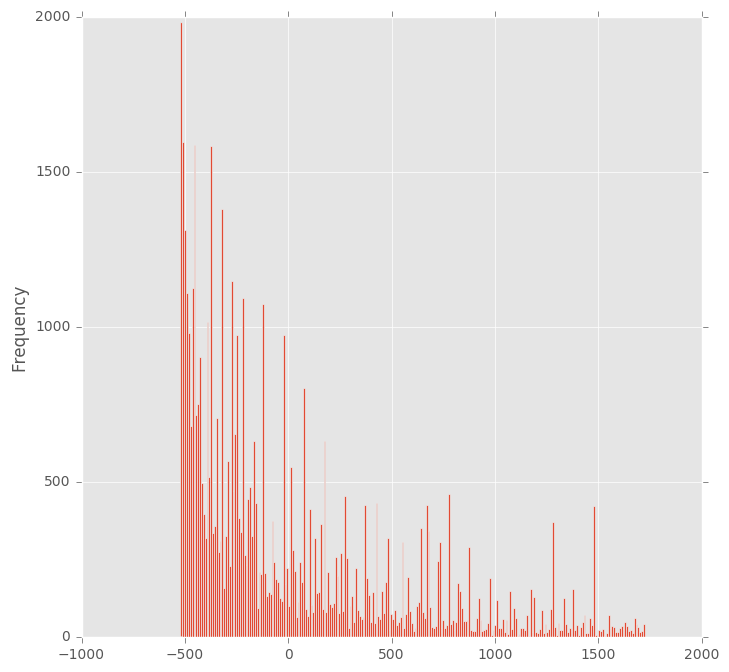

In [59]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

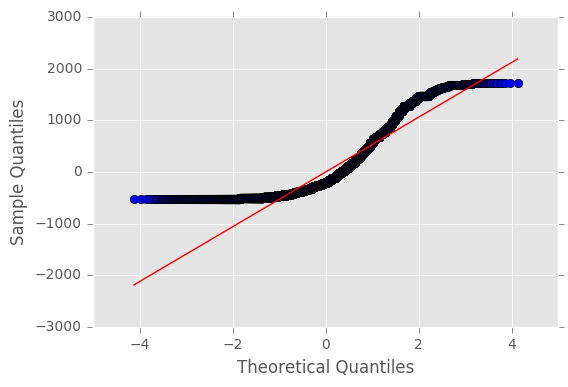

In [60]:
sm.qqplot(model.resid, line = 's')

pass

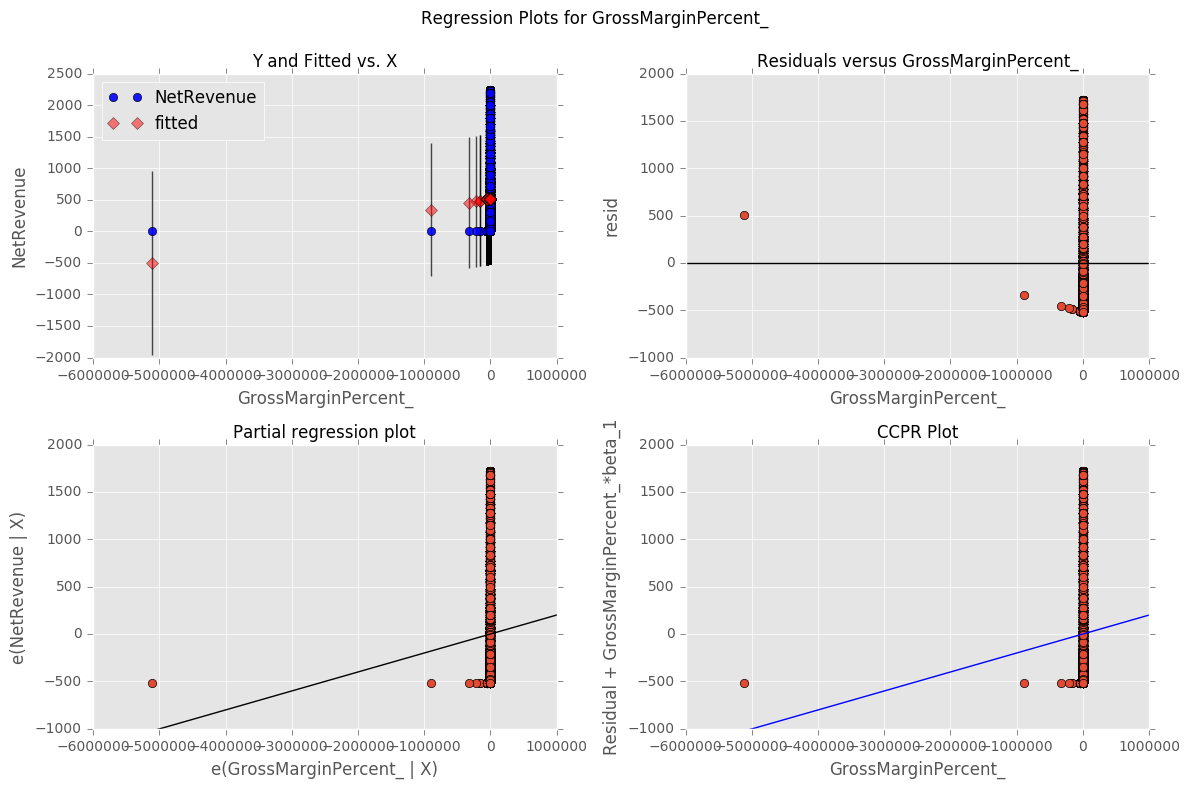

In [62]:
sm.graphics.plot_regress_exog(model, 'GrossMarginPercent_', fig = plt.figure(figsize = (12, 8)))

pass

In [19]:
df.mean()

SKUCode                    193970.423905
UnitsSold_                      2.126564
NetRevenue                    765.379600
TotalCOGS_                    390.289636
GrossMarginDollars_           375.089964
GrossMarginPercent_          -130.921942
CurrentAverageCost_           300.575441
CurrentRetailPriceEach_       703.888699
Current_GM_Each_              230.335235
Discount                     -218.509767
Full_Path_Sales               983.889368
dtype: float64